In [1]:
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.pyplot as plt
from statistics import mean
import math
import json

/usr/local/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
fuzz.token_set_ratio("ab cd efg", "efg cd ab")
fuzz.partial_ratio("ab cd efg", "efg cd ab")

47

In [3]:
file_name = "seen_e2e_kgdial.csv"
df_seen_e2e_kgdial = pd.read_csv(file_name)
df_seen_e2e_kgdial = df_seen_e2e_kgdial.replace({np.nan: None})
df_seen_e2e_kgdial

,Unnamed: 0,topic,last_sentence,checked_sentence,eval_label,generated_sentence
0,0,Blue,Blue,Blue is one of the three primary colours of pi...,Blue is my favorite primary color.,blue is one of the three primary colors .
1,1,Cinematography,"Cinematography\nHi buddy, What you think about...","Cinematography (also called ""Direction of Phot...","Cinematography,is a type of motion picture , c...",i love cinematography ! it ' s a science of mo...
2,2,Genius,Genius,A genius is a person who displays exceptional ...,a genius is a person who displays exceptional ...,"i am a genius , i am a genius and i have a lot..."
3,3,Husky,Husky\nI just got a husky puppy,Husky is a general name for a sled-type of dog...,It sounds cute! Huskies are known amongst sled...,i love huskies ! they are a sled dog that is u...
4,4,Forgetting,Forgetting,Forgetting or disremembering is the apparent l...,Forgetting is the process of losing informatio...,i am not sure how much it is . i know memory i...
5,5,Budweiser,Budweiser\nI think Budweiser taste terrible. H...,Produced in various breweries around the world...,"Yes, and I love it! It's a filtered beer, and...",i have ! it is one of the most popular beers i...
6,6,Coors Brewing Company,Coors Brewing Company\nWho founded Coors Brewi...,"In 1873, German immigrants Adolph Coors and Ja...",In 1873 Adolph Coors and Jacob Schueler founde...,i know that coors was founded in 1873 by germa...
7,7,Italian cuisine,Italian cuisine\nI love Italian cuisine,It has developed through centuries of social a...,Oh yes! It is the best. It's really changed ...,italian cuisine is a great italian dish .
8,8,Purple,"Purple\nMy favorite color is purple, do you kn...",Purple is a color intermediate between blue an...,I don't know much about the color except that ...,i love purple too ! it is a color intermediate...
9,9,Orc,Orc,An orc (also spelled as ork) is a fictional hu...,Orcs are cool fictional humanoid beings,"i love watching the orcs , the fictional human..."


In [4]:
l_ratio_checked_label = []
l_ratio_checked_generated = []
for index, row in df_seen_e2e_kgdial.iterrows():
    if not row["topic"]:
        l_ratio_checked_label.append(None)
        l_ratio_checked_generated.append(None)
        continue
    checked_sentence = row["checked_sentence"]
    eval_label = row["eval_label"]
    generated_sentence = row["generated_sentence"]
    l_ratio_checked_label.append(fuzz.token_set_ratio(checked_sentence, eval_label))
    l_ratio_checked_generated.append(fuzz.token_set_ratio(checked_sentence, generated_sentence))
df_seen_e2e_kgdial["ratio_checked_label"] = l_ratio_checked_label
df_seen_e2e_kgdial["ratio_checked_generated"] = l_ratio_checked_generated
df_seen_e2e_kgdial

,Unnamed: 0,topic,last_sentence,checked_sentence,eval_label,generated_sentence,ratio_checked_label,ratio_checked_generated
0,0,Blue,Blue,Blue is one of the three primary colours of pi...,Blue is my favorite primary color.,blue is one of the three primary colors .,62.0,90.0
1,1,Cinematography,"Cinematography\nHi buddy, What you think about...","Cinematography (also called ""Direction of Phot...","Cinematography,is a type of motion picture , c...",i love cinematography ! it ' s a science of mo...,91.0,80.0
2,2,Genius,Genius,A genius is a person who displays exceptional ...,a genius is a person who displays exceptional ...,"i am a genius , i am a genius and i have a lot...",100.0,73.0
3,3,Husky,Husky\nI just got a husky puppy,Husky is a general name for a sled-type of dog...,It sounds cute! Huskies are known amongst sled...,i love huskies ! they are a sled dog that is u...,59.0,63.0
4,4,Forgetting,Forgetting,Forgetting or disremembering is the apparent l...,Forgetting is the process of losing informatio...,i am not sure how much it is . i know memory i...,88.0,37.0
5,5,Budweiser,Budweiser\nI think Budweiser taste terrible. H...,Produced in various breweries around the world...,"Yes, and I love it! It's a filtered beer, and...",i have ! it is one of the most popular beers i...,73.0,32.0
6,6,Coors Brewing Company,Coors Brewing Company\nWho founded Coors Brewi...,"In 1873, German immigrants Adolph Coors and Ja...",In 1873 Adolph Coors and Jacob Schueler founde...,i know that coors was founded in 1873 by germa...,93.0,78.0
7,7,Italian cuisine,Italian cuisine\nI love Italian cuisine,It has developed through centuries of social a...,Oh yes! It is the best. It's really changed ...,italian cuisine is a great italian dish .,44.0,26.0
8,8,Purple,"Purple\nMy favorite color is purple, do you kn...",Purple is a color intermediate between blue an...,I don't know much about the color except that ...,i love purple too ! it is a color intermediate...,90.0,100.0
9,9,Orc,Orc,An orc (also spelled as ork) is a fictional hu...,Orcs are cool fictional humanoid beings,"i love watching the orcs , the fictional human...",63.0,75.0


In [5]:
dic_topic = {}
for index, row in df_seen_e2e_kgdial.iterrows():
    if not row["topic"] or row["topic"] == "no_passages_used":
        continue
    if row["topic"] not in dic_topic:
        dic_topic[row["topic"]] = 1
    else:
        dic_topic[row["topic"]] +=1
l_count_topic = {}
for key,val in dic_topic.items():
    if val not in l_count_topic:
        l_count_topic[val] = 1
    else:
        l_count_topic[val] += 1
if file_name == "train_e2e_kgdial.csv":
    with open('training_dic_topic.json', 'w') as fp:
        json.dump(dic_topic, fp)
    fp.close()
else:
    fp = open('training_dic_topic.json',)
    dic_topic = json.load(fp)
    fp.close()
# l_count_topic
{k: v for k, v in sorted(dic_topic.items(), key=lambda item: item[1], reverse=True)}

{'Pizza': 919,
 'Dog': 603,
 'Blue': 540,
 'Veganism': 493,
 'Cat': 452,
 'Vegetarianism': 355,
 'Reading (process)': 354,
 'Swimming': 339,
 'New York City': 333,
 "McDonald's": 319,
 'Red hair': 294,
 'Hiking': 291,
 'Cooking': 283,
 'Night owl (person)': 267,
 'Parenting': 250,
 'Divorce': 247,
 'Yoga': 245,
 'Surfing': 243,
 'Chocolate': 240,
 'Steak': 236,
 'Armadillo': 236,
 'Golden Retriever': 225,
 'Heavy metal music': 222,
 'Florida': 222,
 'Sushi': 221,
 'Purple': 214,
 'Italian cuisine': 207,
 'Taco': 207,
 'Game of Thrones': 206,
 'Beach': 203,
 'The Beatles': 196,
 'Piano': 194,
 'Animal shelter': 194,
 'Gardening': 183,
 'Hamburger': 181,
 'Association football': 179,
 'Guitar': 179,
 'Ice cream': 172,
 'Drawing': 172,
 'Yellow': 172,
 'Country music': 171,
 'Ketogenic diet': 169,
 'Skateboarding': 167,
 'Honda Civic': 166,
 'Husky': 160,
 'Rose': 157,
 'Basketball': 155,
 'Tattoo': 151,
 'Violin': 151,
 'Only child': 150,
 'Coffee': 150,
 'Tennis': 144,
 'Chevrolet Corve

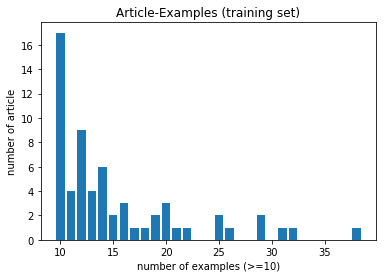

1184


In [6]:
plt_x = []
plt_y = []
count = 0
for key,val in l_count_topic.items():
    if key < 10:
        count += val
        continue
    plt_x.append(key)
    plt_y.append(val)
plt.bar(plt_x,plt_y)
plt.title("Article-Examples (training set)");
plt.xlabel("number of examples (>=10)");
plt.ylabel("number of article");
plt.show()
print(count)

In [7]:
# plt_x = [10,20,30,40,50,60,70,80,90,100]
checked_eval = {10:0,20:0,30:0,40:0,50:0,60:0,70:0,80:0,90:0,100:0}
checked_gen = {10:0,20:0,30:0,40:0,50:0,60:0,70:0,80:0,90:0,100:0}
sum_checked_eval = 0
sum_checked_gen = 0
count = 0 
for index, row in df_seen_e2e_kgdial.iterrows():
    if not row["topic"] or row["topic"] == "no_passages_used":
        continue
    eval_value = math.ceil(row["ratio_checked_label"]/10)*10
    if eval_value == 0:
        eval_value = 10
    gen_value = math.ceil(row["ratio_checked_generated"]/10)*10
    if gen_value == 0:
        gen_value = 10
    checked_eval[eval_value] += 1
    checked_gen[gen_value] += 1
    sum_checked_eval += row["ratio_checked_label"]
    sum_checked_gen += row["ratio_checked_generated"]
    count += 1
print(count)
print(sum_checked_eval/count)
print(checked_eval)
print(sum_checked_gen/count)
print(checked_gen)

3649
68.38722937791175
{10: 1, 20: 6, 30: 37, 40: 202, 50: 436, 60: 602, 70: 661, 80: 650, 90: 568, 100: 486}
46.24006577144423
{10: 9, 20: 146, 30: 749, 40: 1039, 50: 587, 60: 255, 70: 227, 80: 190, 90: 238, 100: 209}


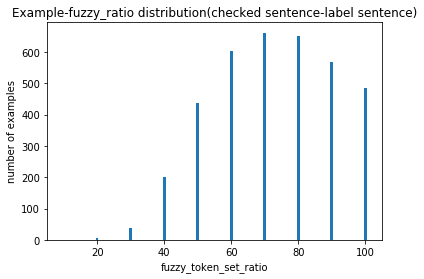

In [8]:
plt_x = []
plt_y = []
for key,val in checked_eval.items():
    plt_x.append(key)
    plt_y.append(val)
plt.bar(plt_x,plt_y)
plt.title("Example-fuzzy_ratio distribution(checked sentence-label sentence)");
plt.xlabel("fuzzy_token_set_ratio");
plt.ylabel("number of examples");
plt.show()

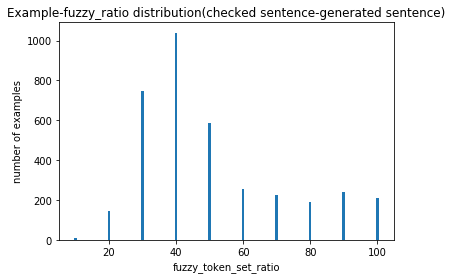

In [9]:
plt_x = []
plt_y = []
for key,val in checked_gen.items():
    plt_x.append(key)
    plt_y.append(val)
plt.bar(plt_x,plt_y)
plt.title("Example-fuzzy_ratio distribution(checked sentence-generated sentence)");
plt.xlabel("fuzzy_token_set_ratio");
plt.ylabel("number of examples");
plt.show()

In [10]:
dic_topic_checked_eval_ratio = {}
dic_topic_checked_gen_ratio = {}
for index, row in df_seen_e2e_kgdial.iterrows():
    if not row["topic"] or row["topic"] == "no_passages_used":
        continue
    if row["topic"] not in dic_topic_checked_eval_ratio:
        dic_topic_checked_eval_ratio[row["topic"]] = [row["ratio_checked_label"]]
    else:
        dic_topic_checked_eval_ratio[row["topic"]].append(row["ratio_checked_label"])
    if row["topic"] not in dic_topic_checked_gen_ratio:
        dic_topic_checked_gen_ratio[row["topic"]] = [row["ratio_checked_generated"]]
    else:
        dic_topic_checked_gen_ratio[row["topic"]].append(row["ratio_checked_generated"])
for key,val in dic_topic_checked_eval_ratio.items():
    dic_topic_checked_eval_ratio[key] = mean(val)
for key,val in dic_topic_checked_gen_ratio.items():
    dic_topic_checked_gen_ratio[key] = mean(val)
print(dic_topic_checked_eval_ratio)
print(dic_topic_checked_gen_ratio)

{'Blue': 66.26923076923077, 'Cinematography': 75.66666666666667, 'Genius': 97.25, 'Husky': 56.333333333333336, 'Forgetting': 83.33333333333333, 'Budweiser': 73.75, 'Coors Brewing Company': 96.5, 'Italian cuisine': 66.92307692307692, 'Purple': 70.6, 'Orc': 55.0, 'The Rolling Stones': 67.0, 'New York City': 57.95, 'Football': 44.5, 'Coco Chanel': 69.22222222222223, 'Basenji': 96.0, 'Stephen Hawking': 64.33333333333333, 'Science fiction': 82.33333333333333, 'Iguana': 66.6875, 'Cake': 87.0, 'Dog': 60.5, 'Ballet': 67.22222222222223, 'Cruise ship': 64.5, 'National Football League': 52.5, 'Nintendo': 74.2, 'Canada': 83.0, 'Peyton Manning': 75.0, 'Narcissus (plant)': 61.5, 'Giant panda': 76.625, 'Autograph': 67.0, 'Basketball': 64.0, 'Star Trek': 86.2, 'Truck': 71.6, 'Drum kit': 63.333333333333336, 'Netflix': 63.416666666666664, 'Depression (mood)': 60.3, 'Bakery': 100.0, 'Slacker': 75.0, 'Reality television': 57.4, 'Drawing': 60.375, 'Swimming': 72.48275862068965, 'Divorce': 68.83333333333333

In [11]:
dic_example_topic_checked_eval_ratio = {}
dic_example_topic_checked_gen_ratio = {}
for key,val in dic_topic_checked_eval_ratio.items():
    if key not in dic_topic:
        dic_topic[key] = 0
    if dic_topic[key] not in dic_example_topic_checked_eval_ratio:
        dic_example_topic_checked_eval_ratio[dic_topic[key]] = [val]
    else:
        dic_example_topic_checked_eval_ratio[dic_topic[key]].append(val)

for key,val in dic_topic_checked_gen_ratio.items():
    if key not in dic_topic:
        dic_topic[key] = 0
    if dic_topic[key] not in dic_example_topic_checked_gen_ratio:
        dic_example_topic_checked_gen_ratio[dic_topic[key]] = [val]
    else:
        dic_example_topic_checked_gen_ratio[dic_topic[key]].append(val)

for key,val in dic_example_topic_checked_eval_ratio.items():
    dic_example_topic_checked_eval_ratio[key] = mean(val)
    
for key,val in dic_example_topic_checked_gen_ratio.items():
    dic_example_topic_checked_gen_ratio[key] = mean(val)
    
print(dic_example_topic_checked_eval_ratio)
print(dic_example_topic_checked_gen_ratio)

{540: 66.26923076923077, 83: 71.58333333333334, 38: 72.22916666666667, 160: 56.333333333333336, 11: 69.35416666666667, 49: 67.23, 48: 71.55898268398268, 207: 65.27403846153845, 214: 70.6, 34: 61.170833333333334, 140: 64.5, 333: 57.95, 47: 67.6, 39: 77.2910934744268, 0: 67.48997890295358, 87: 82.33333333333333, 79: 69.05059523809524, 60: 75.68055555555556, 603: 60.5, 80: 67.4074074074074, 76: 74.65476190476191, 6: 69.53225806451613, 36: 61.93214285714286, 37: 62.827777777777776, 92: 74.85833333333333, 5: 65.16538461538461, 155: 64.0, 44: 72.38571428571429, 17: 68.25208333333333, 106: 65.63690476190476, 81: 66.48125, 42: 67.28333333333333, 41: 61.586309523809526, 18: 68.68166666666667, 172: 71.525, 339: 72.48275862068965, 247: 68.83333333333333, 121: 85.5, 122: 75.04629629629629, 134: 77.5, 116: 74.75, 31: 61.416666666666664, 61: 58.385714285714286, 919: 66.36842105263158, 30: 75.625, 115: 54.833333333333336, 86: 69.73958333333333, 7: 67.35227272727273, 4: 64.37096774193549, 1: 64.940909

[540, 83, 38, 160, 11, 49, 48, 207, 214, 34, 140, 333, 47, 39, 0, 87, 79, 60, 603, 80, 76, 6, 36, 37, 92, 5, 155, 44, 17, 106, 81, 42, 41, 18, 172, 339, 247, 121, 122, 134, 116, 31, 61, 919, 30, 115, 86, 7, 4, 1, 2, 114, 14, 104, 13, 84, 35, 8, 194, 3, 40, 9, 91, 22, 119, 29, 66, 23, 19, 452, 58, 73, 26, 28, 85, 50, 203, 51, 21, 132, 89, 56, 65, 117, 64, 90, 43, 12, 71, 143, 45, 107, 96, 77, 63, 46, 15, 110, 105, 354, 52, 283, 24, 167, 68, 236, 221, 291, 245, 59, 20, 222, 27, 131, 151, 75, 109, 240, 243, 319, 53, 33, 55, 99, 171, 355, 103, 206, 183, 142, 32, 267, 57, 62, 10, 493, 16, 157, 25, 150, 144, 196, 88, 95, 78, 179, 250, 98, 72, 70, 111, 74, 97, 166, 126, 94, 125, 124, 69, 294, 225, 67, 128, 54]
[66.26923076923077, 71.58333333333334, 72.22916666666667, 56.333333333333336, 69.35416666666667, 67.23, 71.55898268398268, 65.27403846153845, 70.6, 61.170833333333334, 64.5, 57.95, 67.6, 77.2910934744268, 67.48997890295358, 82.33333333333333, 69.05059523809524, 75.68055555555556, 60.5, 

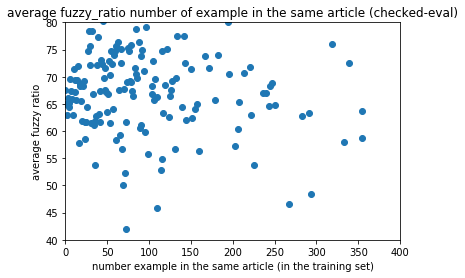

In [12]:
plt_x = []
plt_y = []
for key,val in dic_example_topic_checked_eval_ratio.items():
    plt_x.append(key)
    plt_y.append(val)
print(plt_x)
print(plt_y)
plt.scatter(plt_x,plt_y)
plt.ylim(40, 80)
plt.xlim(0, 400)
plt.title("average fuzzy_ratio number of example in the same article (checked-eval)");
plt.xlabel("number example in the same article (in the training set)");
plt.ylabel("average fuzzy ratio");
plt.show()

[540, 83, 38, 160, 11, 49, 48, 207, 214, 34, 140, 333, 47, 39, 0, 87, 79, 60, 603, 80, 76, 6, 36, 37, 92, 5, 155, 44, 17, 106, 81, 42, 41, 18, 172, 339, 247, 121, 122, 134, 116, 31, 61, 919, 30, 115, 86, 7, 4, 1, 2, 114, 14, 104, 13, 84, 35, 8, 194, 3, 40, 9, 91, 22, 119, 29, 66, 23, 19, 452, 58, 73, 26, 28, 85, 50, 203, 51, 21, 132, 89, 56, 65, 117, 64, 90, 43, 12, 71, 143, 45, 107, 96, 77, 63, 46, 15, 110, 105, 354, 52, 283, 24, 167, 68, 236, 221, 291, 245, 59, 20, 222, 27, 131, 151, 75, 109, 240, 243, 319, 53, 33, 55, 99, 171, 355, 103, 206, 183, 142, 32, 267, 57, 62, 10, 493, 16, 157, 25, 150, 144, 196, 88, 95, 78, 179, 250, 98, 72, 70, 111, 74, 97, 166, 126, 94, 125, 124, 69, 294, 225, 67, 128, 54]
[59.5, 68.25, 52.791666666666664, 46.0, 47.520833333333336, 43.99055555555555, 45.29004329004329, 41.79807692307692, 73.3, 47.236111111111114, 44.95, 66.55, 41.97142857142857, 49.32636684303351, 35.52373417721519, 41.666666666666664, 63.273809523809526, 53.30555555555556, 48.36363636363

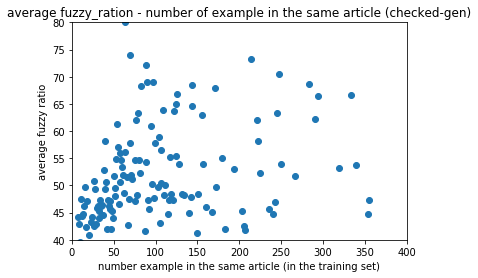

In [13]:
plt_x = []
plt_y = []
for key,val in dic_example_topic_checked_gen_ratio.items():
    plt_x.append(key)
    plt_y.append(val)
print(plt_x)
print(plt_y)
plt.ylim(40, 80)
plt.xlim(0, 400)
plt.scatter(plt_x,plt_y)
plt.title("average fuzzy_ration - number of example in the same article (checked-gen)");
plt.xlabel("number example in the same article (in the training set)");
plt.ylabel("average fuzzy ratio");
plt.show()